<h1 align="center" style="font-family: Georgia, Garamond, serif;">
    Dirac Delta and Heaviside Functions
</h1>

<p  align="center">Contributers: Pranjal</p>

To begin, let's look at the different places you may come across the dirac delta and heaviside functions in your classes or research:

<h3>Dirac Delta Function </h3>
- Electrodynamics: You will most likely see functions in describing densities, whether that's point charges or werird densities on surface or a line. You will also see them with Green's function, which is a solution to a differential equation with a Dirac delta fuction as a source term. 

$$\rho(r,\theta,\phi)=A \delta(r-R)$$

<div style="text-align: center;">
    <div style="display: inline-block; vertical-align: top; margin-right: 20px;">
        <img src="/Math/figs/efield.png" alt="Image 1" width="300px" height="160px">
        <p style="font-size: 10px; text-align: center;">Source: https://byjus.com/physics/electric-field-intensity-due-to-a-thin-uniformly-charged-spherical-shell/</p>
    </div>s/
</div>

For this example, the charge is only at the surface of the shell R. That surface charge can be uniform or not, but the dirac delta fuction makes it such that the charge density is only at R, and zero everywhere else. 

- Quantum Mechanics: You can use the dirac delta funtion as an attractive or repulsive potential well.


<div style="text-align: center;">
    <div style="display: inline-block; vertical-align: top; margin-right: 20px;">
        <img src="diracdel_well.png" alt="Image 1" width="300px" height="200px">
        <p style="font-size: 10px; text-align: center;">Source: https://quantummechanics.ucsd.edu/ph130a/130_notes/node154.html</p>
    </div>
    <div style="display: inline-block; vertical-align: top;">
        <img src="diracdel_sca.png" alt="Image 2" width="300px" height="200px">
        <p style="font-size: 10px; text-align: center;">Source: http://sces.phys.utk.edu/~dagotto/QuantumMechanics/Lectures/QM411_Oct2.pdf</p>
    </div>
</div>

- Classical Mechanics: mass density can also be expressed by using dirac delta functions which you will see when dealing with moment of inertia.

$$\rho(\vec{r}) = \frac{\sigma}{h} \delta(r-R), \; \frac{-l}{2} \leq z \leq \frac{l}{2}$$ 

<div style="text-align: center;">
    <div style="display: inline-block; vertical-align: top; margin-right: 20px;">
        <img src="massden.png" alt="Image 1" width="300px" height="180px">
        <p style="font-size: 10px; text-align: center;">Source: https://www.sciencedirect.com/topics/engineering/cylindrical-shell/</p>
    </div>
</div>

In this example, you can see the mass is only on the shell of the cylinder. Something you'll come across in classical is how the mass distribution affects the moment of inertia tensor. 

<h3>Heaviside Function </h3>

- Electronics: if you have worked with ossciliscopes before, a lot of signals look like heaviside function, for ex. logic pulses amplifier output.

<div style="text-align: center;">
    <div style="display: inline-block; vertical-align: top; margin-right: 20px;">
        <img src="osc.png" alt="Image 1" width="300px" height="210px">
        <p style="font-size: 10px; text-align: center;">Source: https://www.thinksrs.com/products/fs730-3.html</p>
    </div>
</div>


- Quantum Mechanics: tough we don't explicitly call it a heaviside function, but rather a step potential, this perhaps is something more familiar than dirac delta. You will see them when you learn more about 1-D scattering. 

<div style="text-align: center;">
    <div style="display: inline-block; vertical-align: top; margin-right: 20px;">
        <img src="stepV.png" alt="Image 1" width="300px" height="220px">
        <p style="font-size: 9px; text-align: center;">Source: https://www.hansrajcollege.ac.in/hCPanel/uploads/elearning/elearning_document/study_material_from_quantum_mechanics_by_N_zettilli.pdf</p>
    </div>
</div>

- Classical Mechanics: similar to the dirac delta function, mass density can also be expressed by using heaviside function, let's make some modification to our previous cylinder example.

$$\rho(r,\phi,z) = \frac{M}{2\pi R H} \; \theta \left(\frac{l}{2}-|z|\right) \sigma(r-R)$$

<div style="text-align: center;">
    <div style="display: inline-block; vertical-align: top; margin-right: 20px;">
        <img src="massden.png" alt="Image 1" width="300px" height="180px">
        <p style="font-size: 10px; text-align: center;">Source: https://www.sciencedirect.com/topics/engineering/cylindrical-shell/</p>
    </div>
</div>


We use the $\theta$ to delineate heaviside function, in the the dirac delta example the limits in z were explicit, but here we can add the z limit within the mass density.


<h3>What are these functions?</h3>

This first thing you have to know about both of these fuctions is that you can get rid of these by simply changing the range of the integral they are in. Consider an integral,

$$ \int_{0}^{2 \pi} \Phi(\phi) \; \int_{-\infty}^{+\infty} \R(r) \; \delta(r-r_0) \; \,dr \,d\phi .$$

Let's think about what this really represents. We know that the integral of the dirac delta function is only 1 at a single value, in this case that value is $ r_0 $. So, this function would be evaluated as,

$$ \int_{0}^{2 \pi} \Phi(\phi) \; \int_{-\infty}^{+\infty} \R(r) \; \delta(r-r_0) \; \,dr \,d\phi=  \int_{0}^{2 \pi} \Phi(\phi) \; \R(r_0) \,d\phi.$$

Similarly, I could get the same result by simply starting off with the integral,

$$ \int_{0}^{2 \pi} \Phi(\phi) \; \R(r_0) \,d\phi.$$

The need for the dirac delta function may not seem aparent now, but I promise you it is very useful! Imagine having a volume integral with surface charge. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from ipywidgets import interact, FloatSlider
from IPython.display import display

# Gaussian function
def gaussian(x, sigma):
    return np.exp(-x**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi))

# Error function (erf)
def erf(x, sigma):
    integral, _ = quad(lambda t: gaussian(t, sigma), 0, x) #inegrating the gaussian fucntion
    #lamba takes the argument t and evalutates gaussian(t) for a specific sigma
    return integral * 2 / np.sqrt(np.pi)

# Plotting function
def plot_gaussian_and_erf(sigma):
    x = np.linspace(-3, 3, 500)
    gauss_values = gaussian(x, sigma)
    erf_values = np.array([erf(val, sigma) for val in x])
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5)) #creates canvas for two figures side by side
    
    # Plot Gaussian
    ax1.plot(x, gauss_values, 'b-', lw=2)
    ax1.set_title(f'Gaussian Function with σ = {sigma:.2f}')
    ax1.set_xlabel('x')
    ax1.set_ylabel('Gaussian')
    ax1.grid(True)
    ax1.set_ylim(0,5)

    # Plot Error Function
    ax2.plot(x, erf_values, 'r-', lw=2)
    ax2.set_title('Error Function (erf)')
    ax2.set_xlabel('x')
    ax2.set_ylabel('erf(x)')
    ax2.grid(True)

    plt.tight_layout()
    plt.show()

# Slider for adjusting the width (sigma) of the Gaussian
sigma_slider = FloatSlider(value=1.0, min=0.01, max=2.0, step=0.1, description='Sigma:') #change min and max to explore sigma range
interact(plot_gaussian_and_erf, sigma=sigma_slider)

interactive(children=(FloatSlider(value=1.0, description='Sigma:', max=2.0, min=0.01), Output()), _dom_classes…

<function __main__.plot_gaussian_and_erf(sigma)>

<h3>Dirac Delta Identities</h3>

This identity is probably the one you're the most familiar with,
$$\int_{-\infty}^{\infty} f(x) \delta(x-a) dx = f(a) \; .$$

and for x≠a,

$$\delta(-x) = \delta(x) \; \textrm{and} \; \delta(x-a) = \delta(a-x)$$

$$\delta\prime(-x) = -\delta\prime(x) \; \textrm{and} \; \delta\prime(x-a) = -\delta\prime(a-x)$$

$$\delta(a \; x) = \frac{1}{|a|} \delta(x)$$
$$\delta(x^2 - a^2) = \frac{1}{2|a|} [\delta(x+a)+\delta(x-a)]$$

more generally,
$$\delta[g(x)]= \sum_{i} \frac{\delta(x-x_1)}{|g'(x_i)|} $$




<h3>Fourier Transform</h3>

The Fourier transform can be written as:

$$g(\alpha) = \frac{1}{2\pi} \int_{-\infty}^{\infty} \delta(x-a)e^{-i\omega x} dx = \frac{1}{2\pi}e^{-i\omega a}$$

and the inverse tranform would be,
$$\delta(x-a) = \frac{1}{2\pi} \int_{-\infty}^{\infty}e^{i\omega (x-a)} d\omega$$

but, this integral does not converge, however, if the limits $-\infty, \infty$ are replaced by $-n,n$ we get something that increasingly peaks around x=a as n increases and all have area of $1$.


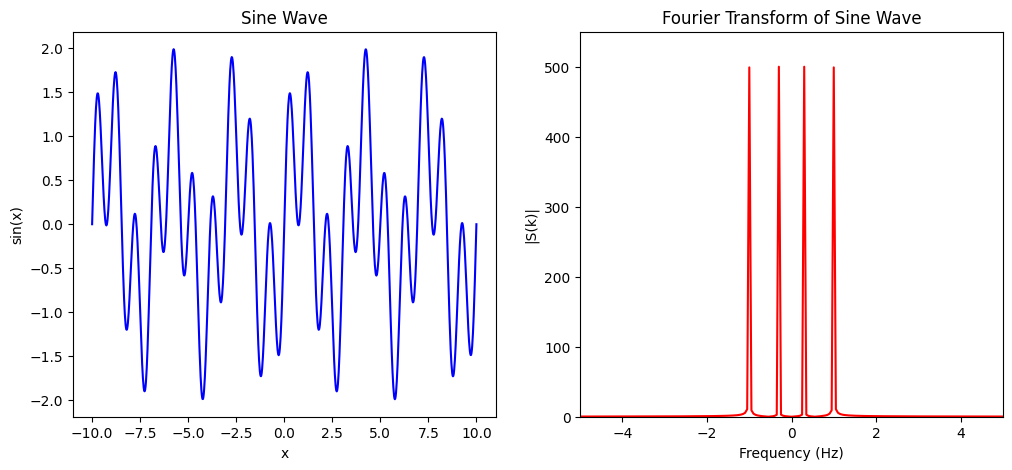

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq, fftshift

# Parameters
x_min, x_max = -10, 10
num_points = 1000
x = np.linspace(x_min, x_max, num_points)
dx = x[1] - x[0]  # spacing between points
frequency = 1.0  # frequency of the sine wave

# Define sine wave function
def sine_wave(x, frequency):
    return np.sin(2 * np.pi * frequency * x)

# Compute sine wave
sine = sine_wave(x, frequency) + sine_wave(x,0.3) ########### add more sine waves here to mix them

# Compute Fourier Transform
S = fft(sine)
k = fftfreq(len(x), dx)
k = fftshift(k)  # Center the zero frequency component
S = fftshift(S)  # Center the zero frequency component
S_magnitude = np.abs(S)  # Magnitude of the Fourier Transform

# Plot sine wave and its Fourier Transform
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Plot sine wave
ax[0].plot(x, sine, color='blue')
ax[0].set_title('Sine Wave')
ax[0].set_xlabel('x')
ax[0].set_ylabel('sin(x)')
#ax[0].set_xlim(x_min, x_max)
#ax[0].set_ylim(-1.5, 1.5)

# Plot Fourier Transform
ax[1].plot(k, S_magnitude, color='red')
ax[1].set_title('Fourier Transform of Sine Wave')
ax[1].set_xlabel('Frequency (Hz)')
ax[1].set_ylabel('|S(k)|')
ax[1].set_xlim(-5, 5)
ax[1].set_ylim(0, np.max(S_magnitude) * 1.1)  # Adjust ylim based on the data

plt.show()

<h3>Heaviside or Step Function</h3>

A discontinuous function, that we often write as:
$$H(x) \; \textrm{or} \; \Theta(x) = \left\{ \begin{array}{ll} 1 \quad x \geq 0 \\ 0 \quad x<0 \end{array} \right .$$

First thing, let's connect what we have been learning about the Dirac Delta function to the Heavyside function

$$\frac{d}{dx}\Theta(x) = \delta(x)$$

and therefore, is also seen as the antiderivative of the Dirac delta function.



In [4]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Define the smooth Heaviside function
def smooth_heaviside(x, epsilon):
    return 0.5 * (1 + np.tanh(x / epsilon))

# Define the derivative of the smooth Heaviside function
def derivative_smooth_heaviside(x, epsilon):
    return 1 / (epsilon * np.cosh(x / epsilon)**2)

# Define the interactive plot function
def plot_heaviside_and_derivative(epsilon):
    x = np.linspace(-2, 2, 1000)
    y_heaviside = smooth_heaviside(x, epsilon)
    y_derivative = derivative_smooth_heaviside(x, epsilon)
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

    # Plot the smooth Heaviside function
    ax1.plot(x, y_heaviside, label=f'Heaviside with ε={epsilon:.3f}', color='blue')
    ax1.set_title('Smooth Heaviside Function')
    ax1.set_xlabel('x')
    ax1.set_ylabel('H(x)')
    ax1.set_ylim(-0.1, 1.1)
    ax1.legend()
    ax1.grid(True)

    # Plot the derivative of the smooth Heaviside function
    ax2.plot(x, y_derivative, label=f'Derivative of Heaviside with ε={epsilon:.3f}', color='red')
    ax2.set_title('Derivative of the Smooth Heaviside Function')
    ax2.set_xlabel('x')
    ax2.set_ylabel("f'(x)")
    ax2.set_ylim(-0.1, 12)
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()

# Create an interactive slider for epsilon
interact(plot_heaviside_and_derivative, epsilon=FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01));

interactive(children=(FloatSlider(value=0.1, description='epsilon', max=1.0, min=0.01, step=0.01), Output()), …

We can go further and use a function $f(x)$

$$\Theta(x)\;f(x)= \left\{ \begin{array}{ll} f(x) \quad x \geq 0 \\ 0 \quad \; x<0\end{array} \right. $$

Suppose that $f(x) = x^2$ then the Heaviside function will look something like this

$$\Theta(x)\;x^2= \left\{ \begin{array}{ll} x^2 \quad x \geq 0 \\ 0 \quad \; x<0\end{array} \right. $$


<div style="text-align: center;">
    <div style="display: inline-block; vertical-align: top; margin-right: 20px;">
        <img src="heaviside.png" alt="Image 1" width="300px" height="180px">
        <p style="font-size: 10px; text-align: center;">Source: https://www.slideshare.net/SeanPereira2/heavisides-function#10/</p>
    </div>
</div>
